In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [ ]:
data = np.array(pd.read_csv("train.csv"))

m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255

In [ ]:
# Create a classifier: a support vector classifier
clf = svm.SVC(kernel='rbf')

# Learn the digits on the train subset
clf.fit(X_train.T, Y_train.T)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_dev.T)

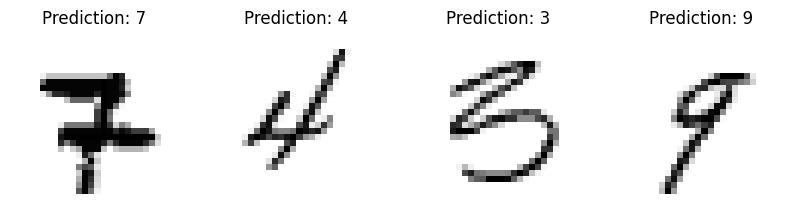

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_dev.T, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(Y_dev.T, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       116
           1       1.00      0.99      1.00       103
           2       0.95      0.97      0.96       103
           3       0.97      0.91      0.94       102
           4       0.96      0.99      0.97        98
           5       0.95      0.98      0.96        82
           6       0.99      0.98      0.98        99
           7       0.97      0.97      0.97       118
           8       0.95      0.95      0.95        77
           9       0.96      0.96      0.96       102

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000




In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = test/255
test_predictions = clf.predict(np.array(X_test))


In [ ]:
submission = pd.read_csv("sample_submission.csv")

for i in range(28000):
  submission.loc[i, "Label"] = test_predictions[i]

submission.to_csv("sample_submission.csv", index=False)

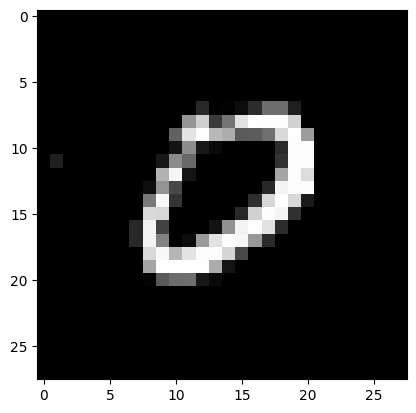

In [ ]:
current_image = np.array(np.array(X_test)[3])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

